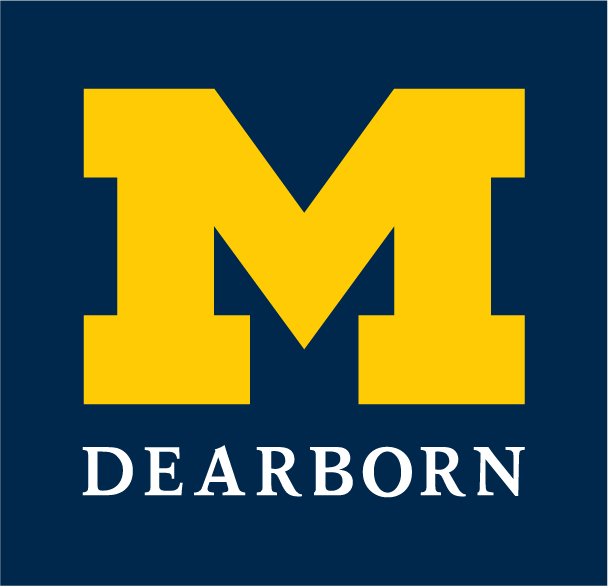

<h1>Sentiment Analysis of Twitter Data Using Machine Learning Techniques</h1>

Students in the project group:
● Branden Oden and
● Mouncif Lomri


Project Description:
In this project, we will analyze stock-related tweets to determine public sentiment and predict
stock price movements. By leveraging natural language processing (NLP) techniques, we aim to
classify tweets into positive, negative, or neutral sentiment and correlate this sentiment with
stock price trends. The outcome
will help investors and analysts make informed decisions based on social media sentiment.





## **1.1** Connect to Kaggle Api


* Initiate the connection with Google Drive

In [1]:
! pip install kaggle


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140




## **1.2** Load and analyze Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1')
df.sample(100)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
679819,0,2249335229,Fri Jun 19 22:08:25 PDT 2009,NO_QUERY,Zveshi,@BitchenFries I bet those are members only par...
1225,0,1468111947,Mon Apr 06 23:46:44 PDT 2009,NO_QUERY,tori_owns,im so tired this morning and there was only co...
1456162,4,2063473822,Sun Jun 07 02:48:14 PDT 2009,NO_QUERY,veganwordnerd,"Ani Sunday, day of a few friends Twittering th..."
580617,0,2214011356,Wed Jun 17 16:08:42 PDT 2009,NO_QUERY,Shirvaney,Rainy day ahead
349901,0,2017406967,Wed Jun 03 08:20:27 PDT 2009,NO_QUERY,gingerboystew,Computing exam tomorrow! Then study leave is o...
...,...,...,...,...,...,...
237167,0,1980145601,Sun May 31 05:50:36 PDT 2009,NO_QUERY,traceylien,@tnbasement Neither. Kind of...vegetably and.....
263090,0,1986418859,Sun May 31 18:48:34 PDT 2009,NO_QUERY,EmilyRetherford,"@Kecia08 Naps always sound like a great idea, ..."
136713,0,1880157134,Fri May 22 00:16:53 PDT 2009,NO_QUERY,Essitam,"My sausage lip has gone, swelling has abated b..."
693756,0,2252813924,Sat Jun 20 07:02:55 PDT 2009,NO_QUERY,miguelstdancer,@mcflyharry


In [5]:
df.shape

(1599999, 6)

In [6]:
columns=['target','id','date','flag','user','text']
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",names=columns, encoding='ISO-8859-1')
df.sample(100)

,target,id,date,flag,user,text
389291,0,2054423075,Sat Jun 06 07:19:11 PDT 2009,NO_QUERY,LPJayJay,"cleaning up, packing up the van, and heading h..."
1102025,4,1970814188,Sat May 30 05:18:16 PDT 2009,NO_QUERY,meganneill8,going into town with sophie
106939,0,1823753822,Sat May 16 22:52:51 PDT 2009,NO_QUERY,djswiftofficial,"@ckdub lmao, i want one i just dont kno what t..."
627869,0,2231072163,Thu Jun 18 18:00:26 PDT 2009,NO_QUERY,QuaLLyWood89,Saw Ms Hill bka &quot;Keenyas sister&quot; on ...
272246,0,1990163789,Mon Jun 01 04:04:35 PDT 2009,NO_QUERY,CatherineRoyle,This day last year Croke Park 08.. Wat an amaz...
...,...,...,...,...,...,...
1311225,4,2013444291,Tue Jun 02 22:41:26 PDT 2009,NO_QUERY,timecommander,@TrinaMb thats what i was shooting for with th...
1256850,4,1997562925,Mon Jun 01 17:04:05 PDT 2009,NO_QUERY,mandrz,Just got hit with a water balloon by my son! S...
762839,0,2298069077,Tue Jun 23 11:13:05 PDT 2009,NO_QUERY,snipeyhead,@abraham LOL I totally feel you on that. My la...
797408,0,2328155157,Thu Jun 25 09:14:10 PDT 2009,NO_QUERY,whoaitsgabby7,you're not the same anymore.




## **1.3** Dataset Visualization

In [7]:
print(len(df))

1600000


In [8]:
df.isnull().sum()


,0
target,0
id,0
date,0
flag,0
user,0
text,0


###  **1.3.1** Matplotlib</h4>

In [9]:
import matplotlib.pyplot as plt

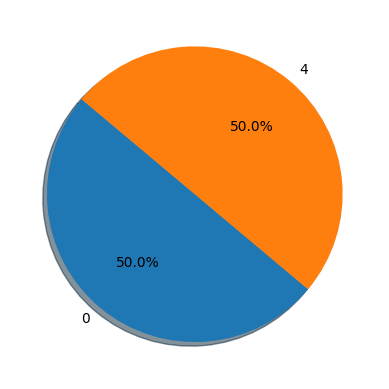

In [10]:
sentiment_count = df["target"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [11]:
print(df.columns)

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')


In [12]:
sentiment_count = df["target"].value_counts()

print(sentiment_count)

target
0    800000
4    800000
Name: count, dtype: int64


In [13]:
print(f"Number of + tweets: {df[df['target'] == 0].shape[0]}")
print(f"Number of - tweets: {df[df['target'] == 4].shape[0]}")
print(f"Number of neutral tweets: {df[df['target'] == 2].shape[0]}")


Number of + tweets: 800000
Number of - tweets: 800000
Number of neutral tweets: 0


remplace 4 by 1  inpositive sentiment

In [14]:
df.replace({'target': {4: 1}}, inplace=True)
# Assuming 'label' is an integer column
print(f"Number of + tweets: {df[df['target'] == 0].shape[0]}")
print(f"Number of - tweets: {df[df['target'] == 1].shape[0]}")
print(f"Number of neutral tweets: {df[df['target'] == 2].shape[0]}")

Number of + tweets: 800000
Number of - tweets: 800000
Number of neutral tweets: 0


In [15]:
sentiment_count = df["target"].value_counts()

print(sentiment_count)

target
0    800000
1    800000
Name: count, dtype: int64


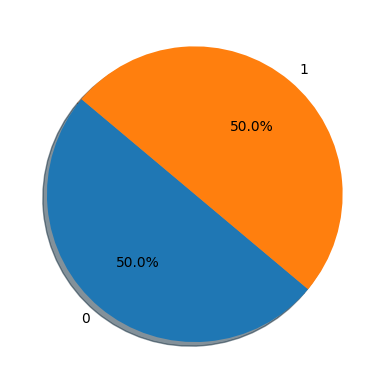

In [16]:
sentiment_count = df["target"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

### **1.3.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [17]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.7 MB/s eta 0:00:00


In [18]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

         target          id                          date      flag  \
800000        1  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001        1  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002        1  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003        1  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004        1  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       1  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       1  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       1  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       1  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       1  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
800000             ersle       I LOVE @Health4UandPets u guys r the b

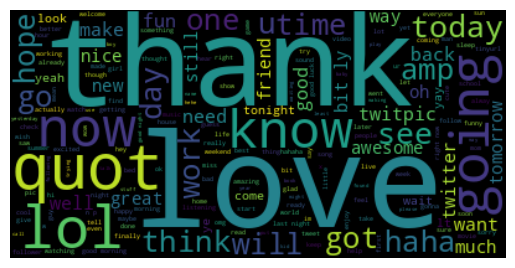

In [19]:
pos_tweets = df[df["target"]==1]
# Show the entire filtered DataFrame
print(pos_tweets)

txt = " ".join(tweet.lower() for tweet in pos_tweets["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* ... and in negative tweets?

        target          id                          date      flag  \
0            0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1            0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2            0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3            0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4            0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
799995       0  2329205009  Thu Jun 25 10:28:28 PDT 2009  NO_QUERY   
799996       0  2329205038  Thu Jun 25 10:28:28 PDT 2009  NO_QUERY   
799997       0  2329205473  Thu Jun 25 10:28:30 PDT 2009  NO_QUERY   
799998       0  2329205574  Thu Jun 25 10:28:30 PDT 2009  NO_QUERY   
799999       0  2329205794  Thu Jun 25 10:28:31 PDT 2009  NO_QUERY   

                   user                                               text  
0       _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    

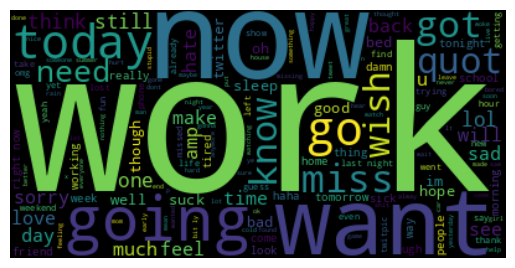

In [20]:
pos_tweets = df[df["target"]==0]
# Show the entire filtered DataFrame
print(pos_tweets)

txt = " ".join(tweet.lower() for tweet in pos_tweets["text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



##  2.Text Normalization

* Import `regex` package

In [21]:
import re

###  **2.1** RT Tag

* Replace occurences of `RT` with a default value

In [22]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

###  **2.2** @User Tag

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [24]:
import re

def replace_user(tweet, default_replace="twitteruser"):
    # This regex will match any @username pattern, even at the beginning
    tweet = re.sub(r'@\w+', default_replace, tweet)
    return tweet

###  **2.3** Emojis

* Install the `emoji` package

In [25]:
pip install emoji --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.5 MB/s eta 0:00:00


In [26]:
import emoji

* Replace emojis with a meaningful text

In [27]:
def delete_emoji(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

###  **2.4** URL

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [28]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [29]:
df['url'] = df['text'].apply(replace_url)

###  **2.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [30]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

### **2.6** Remove upper capitalization

* Lower case each letter in a specific tweet

In [31]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

###  **2.7** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [32]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

###  **2.8** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [33]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

###  **2.9** Word contraction

* Install the `contractions` package

In [34]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.4 MB/s eta 0:00:00


In [35]:
import contractions

* Use `contractions_dict` to list most common contractions

In [36]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [37]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [38]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet



## **2.10** Tokenization

In [39]:
pip install nltk

In [40]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [41]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

* Import the `string` package

In [42]:
import string

In [43]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'s', 'been', 'll', 'y', 'same', "i'm", 'him', 'weren', 'for', "shouldn't", 'itself', 'own', 'while', "weren't", 'all', 'couldn', 'this', 'himself', 'had', 'the', 'during', 'my', 'not', "we've", 'won', 'am', 'nor', 'isn', 'more', 'did', 'but', 'so', 'wouldn', "wouldn't", 'her', 'on', "hasn't", 't', 'being', 'whom', 'just', "i'll", 'off', 'are', 'me', 'you', 'very', 'doesn', "it'd", 'no', 'ma', 'too', 'yourselves', 'to', 're', 'why', 'those', "he's", 'theirs', "you'd", 'about', 'does', 'is', 'that', 'do', 'aren', 'any', 'having', 'after', "we'd", 'at', 'most', 'shouldn', 'd', 'were', "she'll", "he'd", 'our', 'she', 'between', 'mightn', 'once', 'what', 'here', "that'll", 'he', 'yourself', 'into', 'ours', "i've", 'from', 'mustn', "should've", 'up', "they've", "aren't", 'against', 'both', 'if', 'doing', "mightn't", 'herself', "she's", 'can', "you've", 'through', 'm', "don't", 'needn', 'than', 'should', 'a', 'and', "we'll", 'haven', "he'll", "it's", 'these', "they'll", 'under', "it'll", 'it

In [46]:
stop_words.discard('not')
print(stop_words)

{'s', 'been', 'll', 'y', 'same', "i'm", 'him', 'weren', 'for', "shouldn't", 'itself', 'own', 'while', "weren't", 'all', 'couldn', 'this', 'himself', 'had', 'the', 'during', 'my', "we've", 'won', 'am', 'nor', 'isn', 'more', 'did', 'but', 'so', 'wouldn', "wouldn't", 'her', 'on', "hasn't", 't', 'being', 'whom', 'just', "i'll", 'off', 'are', 'me', 'you', 'very', 'doesn', "it'd", 'no', 'ma', 'too', 'yourselves', 'to', 're', 'why', 'those', "he's", 'theirs', "you'd", 'about', 'does', 'is', 'that', 'do', 'aren', 'any', 'having', 'after', "we'd", 'at', 'most', 'shouldn', 'd', 'were', "she'll", "he'd", 'our', 'she', 'between', 'mightn', 'once', 'what', 'here', "that'll", 'he', 'yourself', 'into', 'ours', "i've", 'from', 'mustn', "should've", 'up', "they've", "aren't", 'against', 'both', 'if', 'doing', "mightn't", 'herself', "she's", 'can', "you've", 'through', 'm', "don't", 'needn', 'than', 'should', 'a', 'and', "we'll", 'haven', "he'll", "it's", 'these', "they'll", 'under', "it'll", 'its', 'ot

In [47]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* exemple of function with a particular tweet

In [48]:
tweet = "these are 5 different words!"

In [49]:
print("Tweet tokens: {}".format(custom_tokenize(tweet,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']




## **2.11** Stemming

In [50]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [51]:
tokens = ["manager", "management", "managing"]

In [52]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [53]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [54]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [55]:
tokens = ["international", "companies", "had", "interns"]

In [56]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']




## **2.12** Lemmatization

In [57]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [58]:
tokens = ["international", "companies", "had", "interns"]

In [59]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

In [60]:
lemmatizer = WordNetLemmatizer()

In [61]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list


In [62]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']




## **2.13**  all processing

* Long and complex tweet to be processed

In [63]:
complex_tweet = r"""RT @jhon : he looooook,
THis is a big and complex TWeet!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

In [64]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = delete_emoji(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [65]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


In [66]:
import random

In [67]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: Started work at 5am on a saturday boooo 
Post Twitter processing tweet: Started work at 5am on a saturday boooo 
Post Word processing tweet: started work at 5am on a saturday boo 
['start', 'work', 'saturday', 'boo']


Initial tweet: its Tai Chi Friday for me......i think I am much better prepared for class today than last week 
Post Twitter processing tweet: its Tai Chi Friday for me......i think I am much better prepared for class today than last week 
Post Word processing tweet: its tai chi friday for me.i think i am much better prepared for class today than last week 
['tai', 'chi', 'friday', 'think', 'much', 'better', 'prepar', 'class', 'today', 'last', 'week']


Initial tweet: BAH SO TIRED &amp; I CAN'T DRAW ANYTHING.  I think my drawer is broken. G'NIGHT TWITTS
Post Twitter processing tweet: BAH SO TIRED &amp; I CAN'T DRAW ANYTHING.  I think my drawer is broken. G'NIGHT TWITTS
Post Word processing tweet: bah so tired &amp; i cannot draw anything.  i think my drawe



#  3.Text Representation </h2>



## **3.1** Processing Tweets

In [68]:
pip install -U scikit-learn

* Apply `process_tweet` function  to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [69]:
df["tokens"] = df["text"].apply(process_tweet)
df["tweet_sentiment"] = df["target"].map({1: '1', 0: '0'})





In [70]:
df_sorted = df.sort_values(by='id', ascending=True)

# Shuffle the data after sorting by 'id' and reset the index
df_shuffled = df_sorted.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.head(8001)

,target,id,date,flag,user,text,url,tokens,tweet_sentiment
0,0,1975142734,Sat May 30 14:32:09 PDT 2009,NO_QUERY,LouiseStarGirl,@dougiemcfly http://twitpic.com/67uc7 - aww bl...,@dougiemcfly - aww bless ya am sure ya will b...,"[aww, bless, ya, sure, ya, amaz, ya, not, onle...",0
1,1,1467898572,Mon Apr 06 22:42:58 PDT 2009,NO_QUERY,PetParentAuthor,A healthy remedy for you AND your dog http://...,A healthy remedy for you AND your dog #dogs,"[healthi, remedi, dog, dog]",1
2,0,1999149757,Mon Jun 01 19:43:35 PDT 2009,NO_QUERY,kappymann,"RIP for GM, as GM goes, so goes America","RIP for GM, as GM goes, so goes America","[rip, gm, gm, goe, goe, america]",0
3,1,1827746500,Sun May 17 11:21:35 PDT 2009,NO_QUERY,ccjoonas,@xsmiileyamii haha!! xD oh guurl! I see you go...,@xsmiileyamii haha!! xD oh guurl! I see you go...,"[haha, xd, oh, guurl, see, got, rayban, huuh]",1
4,0,1991238899,Mon Jun 01 06:40:10 PDT 2009,NO_QUERY,giantlawnmower,"@scifimlb Nope, airing the same time on BBC Am...","@scifimlb Nope, airing the same time on BBC Am...","[nope, air, time, bbc, america, held, back, ti...",0
...,...,...,...,...,...,...,...,...,...
7996,1,2063787982,Sun Jun 07 04:04:35 PDT 2009,NO_QUERY,McSapirFly,@30SECONDSTOMARS Have a good luck guys that C...,@30SECONDSTOMARS Have a good luck guys that C...,"[good, luck, guy, cd, go, awsom]",1
7997,1,1833380056,Sun May 17 23:06:22 PDT 2009,NO_QUERY,jcariaga,gooooodnight,gooooodnight,[goodnight],1
7998,1,1791937789,Wed May 13 21:35:32 PDT 2009,NO_QUERY,scorbin2,"has another busy day tomorrow at work, but i L...","has another busy day tomorrow at work, but i L...","[anoth, busi, day, tomorrow, work, love]",1
7999,0,1991155816,Mon Jun 01 06:30:39 PDT 2009,NO_QUERY,jbkilluh,12 hrs of shooting only to be stuck in dead st...,12 hrs of shooting only to be stuck in dead st...,"[hrs, shoot, stuck, dead, stop, traffic, way, ...",0


* Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)







In [71]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()



## **3.2** Bag of Word

In [72]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [75]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [76]:

ft = cv_vect.get_feature_names_out()


In [77]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


In [78]:
cv_mtx = cv_vect.transform(corpus)

In [79]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [80]:
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [81]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [82]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])



## **3.3** Term Frequency – Inverse Document Frequency (TF-IDF)

In [83]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [86]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

In [87]:
# Assuming tf_vect TfidfVectorizer instance
ft = tf_vect.get_feature_names_out()


In [88]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


In [89]:
print(tf_mtx.shape)

(6, 13)


In [90]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [91]:
new_tweet = [["I", "hate", "nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])



#  4.Training & test & evaluation

In [92]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn



## **4.1** Train/Test Split

In [93]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

* Import the `train_test_split` function from the Scikit-Learn package

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
import numpy as np

# Sort the dataframe by the 'id' column
df_sorted = df.sort_values(by='id', ascending=True)

# Shuffle the data after sorting by 'id'
df_shuffled = df_sorted.sample(frac=1, random_state=42).reset_index(drop=True)

# Then split the shuffled data
X_train, X_test, y_train, y_test = train_test_split(df["tokens"], df["tweet_sentiment"],
                                                    random_state=0,
                                                    train_size=0.80)


In [96]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 1280000
Size of y_train: 1280000


Size of X_test: 320000
Size of y_test: 320000


Train proportion: 80%


In [97]:
print(df.columns)

Index(['target', 'id', 'date', 'flag', 'user', 'text', 'url', 'tokens',
       'tweet_sentiment'],
      dtype='object')




## **4.2** Logistic Regression

* Import the `LogisticRegression` model from Scikit-Learn

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

* Create a `fit_lr` function used to fit a Logistic Regression model on X and y *training* data

In [99]:


from sklearn.preprocessing import MaxAbsScaler

def fit_lr(X_train, y_train):
    scaler = MaxAbsScaler()  # Works well for sparse data
    X_train_scaled = scaler.fit_transform(X_train)

    model = LogisticRegression(max_iter=500, solver='saga')  # 'saga' is good for large-scale sparse data
    model.fit(X_train_scaled, y_train)

    return model

###  **4.2.1** Logistic with  bag of words

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [100]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [101]:
model_lr_cv = fit_lr(X_train_cv, y_train)




###  **4.2.2** TF-IDF

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [102]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [103]:
model_lr_tf = fit_lr(X_train_tf, y_train)



## **4.3** Performance Metrics

* Import the `accuracy score` and `confusion matrix` from Scikit-Learn

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

###  **4.3.1** Bag of words

In [105]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [106]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 76.99%


<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

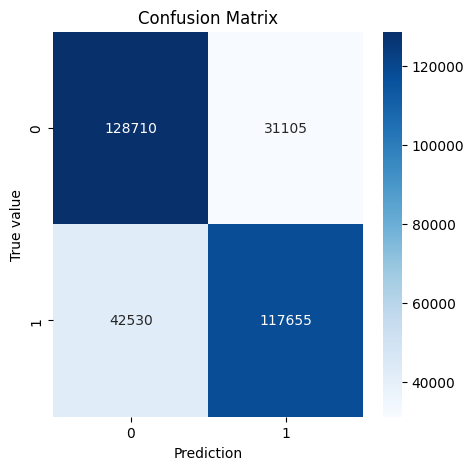

In [107]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

###  **4.3.2** TF-IDF

In [108]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [109]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 78.26%


<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

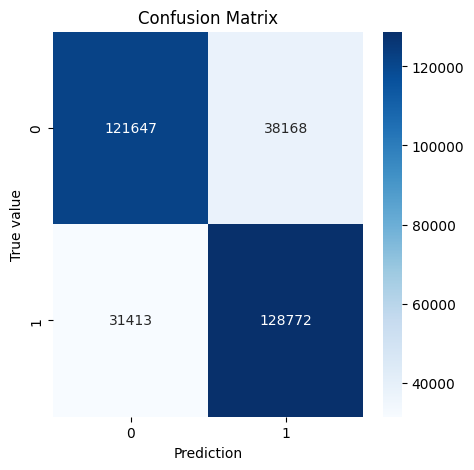

In [110]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Precision          : {:.2%}".format(precision_score(y_test, y_pred_lr_tf, pos_label='1')))
print("Recall             : {:.2%}".format(recall_score(y_test, y_pred_lr_tf, pos_label='1')))
print("F1 Score           : {:.2%}".format(f1_score(y_test, y_pred_lr_tf, pos_label='1')))


Precision          : 77.14%
Recall             : 80.39%
F1 Score           : 78.73%
Model Evaluation
Accuracy: 0.7826

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159815
           1       0.77      0.80      0.79    160185

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



## **4.4** Mini-Pipeline


In [ ]:
your_tweet = """ good for more normal """
print(process_tweet(your_tweet))
transformed_tweet = tf.transform(process_tweet(your_tweet))
print(transformed_tweet)
prediction = model_lr_tf.predict(transformed_tweet)
print(prediction)

['good', 'normal']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (2, 165599)>
  Coords	Values
  (0, 53162)	0.29891000602830625
  (0, 102069)	0.9542813045932305
  (1, 0)	0.626395483921705
  (1, 79566)	0.33171498206492606
  (1, 96700)	0.27054325722257144
  (1, 102069)	0.5864517564834539
  (1, 116111)	0.28368036887495784
['1' '1']


* Create a `predict_tweet` function used to pre-process, transform and predict tweet sentiment

In [ ]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)

  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction[0] == '1':
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [ ]:
predict_tweet(your_tweet)

'Prediction is positive sentiment'

# 4.5 Multinomial Naive Bayes

Model Evaluation
Accuracy: 0.7455

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75    160000
           1       0.75      0.74      0.74    160000

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



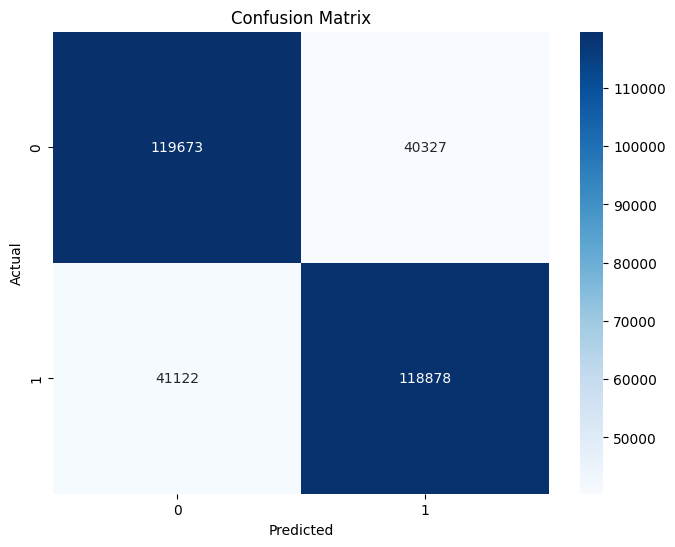


Example Prediction:
Text: I love this product! It's amazing.
Predicted sentiment: 1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


if isinstance(df["tokens"].iloc[0], list):
    df["processed_text"] = df["tokens"].apply(lambda x: ' '.join(x))
else:
    df["processed_text"] = df["tokens"]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

X = tfidf_vectorizer.fit_transform(df["processed_text"])
y = df["tweet_sentiment"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 80% train, 20% test
    random_state=42,
    stratify=y
)

# Initialize and train Multinomial Naive Bayes
nb_classifier = MultinomialNB(alpha=1.0)
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluation
print("Model Evaluation")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_,
            yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Example Prediction
sample_text = ["I love this product! It's amazing."]
sample_vec = tfidf_vectorizer.transform(sample_text)
print("\nExample Prediction:")
print(f"Text: {sample_text[0]}")
print(f"Predicted sentiment: {nb_classifier.predict(sample_vec)[0]}")